# Práctica 2

In [2]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [4]:
def dataProcessing(datos):
    X = datos[:, :-1]
    Y = datos[:, -1]
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    return X, Y, m, n

## Ejercicio 1

In [5]:
#Debe funcionar con un entero, un vector y una matriz. Para un vector y una matriz debe ser el resultado de aplicarle la
#función sigmoide a cada elemento del vector o la matriz.
def sigmoide(z):
    return (1.0/(1.0+np.exp(-z)))

In [6]:
def coste(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Term1 = np.matmul(y, np.log(H))
    Term2 = np.matmul((1 - y), np.log(1 - H))
    cost = (- 1 / (len(y))) * np.sum(Term1 + Term2)
    return cost

In [7]:
def gradiente(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Dif = H - y
    grad = (1 / len(y)) * np.matmul(Dif, X)
    return grad

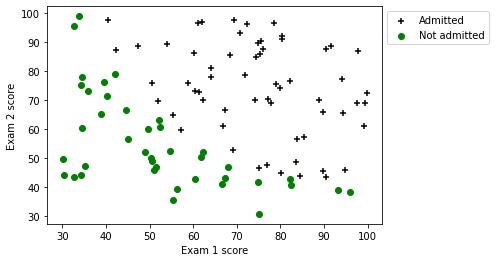

In [8]:
datos = carga_csv('ex2data1.csv')
X, Y, m, n = dataProcessing(datos)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='Admitted')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))


In [9]:
X_1 = np.hstack([np.ones([m, 1]), X])

In [10]:
Theta = np.zeros(n+1)

#print(Theta)
#print(X)
#print(Y)
c = coste(Theta, X_1, Y)
grad = gradiente(Theta, X_1, Y)
print('Coste = {}'.format(c))
print('Gradiente = {}'.format(grad))

Coste = 0.6931471805599452
Gradiente = [ -0.1        -12.00921659 -11.26284221]


In [11]:
result = opt.fmin_tnc(func=coste, x0=Theta, fprime=gradiente, args=(X_1,Y))
Theta_opt=result[0]
coste_opt = coste(Theta_opt, X_1, Y)
print('Coste = {}'.format(coste_opt))

Coste = 0.20349770158947458
[0. 0. 0.]


In [12]:
def pinta_frontera_recta(X, Y, theta):
   # plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    
    #plt.savefig("frontera.pdf")
    #plt.show()
    #plt.close()

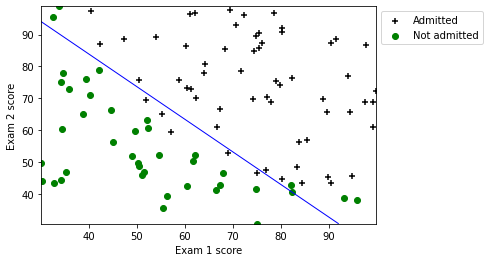

In [13]:
pinta_frontera_recta(X, Y, Theta_opt)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='Admitted')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))

In [14]:
def evaluacion(theta, X, Y):
    prediccion = sigmoide(np.matmul(theta, np.transpose(X)))
    prediccion[prediccion >= 0.5] = 1
    prediccion[prediccion < 0.5] = 0
    porcentaje = np.asarray(np.where(prediccion == Y)).size
    return  (porcentaje / len(Y))*100

In [15]:
porcentaje_aciertos = evaluacion(Theta_opt, X_1, Y)
print("El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: {}%".format(porcentaje_aciertos))

El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: 89.0%


## Ejercicio 2

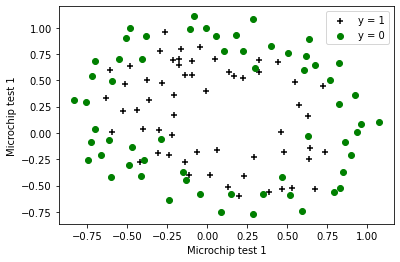

In [109]:
datos = carga_csv('ex2data2.csv')
X, Y, m, n = dataProcessing(datos)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='y = 1')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'y = 0')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 1')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))

In [110]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [111]:
def coste_reg(Theta, X, y, Lambda):
    Term1 = coste(Theta, X, y)
    Term2 = (Lambda/(2*len(y))) * np.sum(Theta**2)
    cost = Term1 + Term2
    return cost 

In [112]:
def gradiente_reg(Theta, X, y, Lambda):
    grad = gradiente(Theta, X, y) + ((Lambda/len(y))*np.r_[[0],Theta[1:]])
    return grad

In [113]:
Theta = np.zeros(XX.shape[1])
Lambda = 1
c = coste_reg(Theta, XX, Y, Lambda)
grad = gradiente_reg(Theta, XX, Y, Lambda)
print('Coste = {}'.format(c))
print('Gradiente = {}'.format(grad))

Coste = 0.6931471805599453
Gradiente = [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [114]:
result = opt.fmin_tnc(func=coste_reg, x0=Theta, fprime=gradiente_reg, args=(XX,Y,Lambda))
Theta_opt=result[0]
print(Theta_opt)
coste_opt = coste_reg(Theta_opt, XX, Y, Lambda)
print('Coste = {}'.format(coste_opt))

[ 1.25441477  0.62276773  1.19242761 -2.00505516 -0.8729073  -1.3618428
  0.12573868 -0.35536853 -0.35603632 -0.17096338 -1.45784679 -0.06683332
 -0.61498631 -0.25080287 -1.18096017 -0.22566832 -0.20562891 -0.06382327
 -0.27187026 -0.27658992 -0.4683599  -1.0324734   0.01627589 -0.29695275
  0.00581075 -0.32631634 -0.12073388 -0.93022953]
Coste = 0.5357749530684597


In [121]:
def plot_decisionboundary(X, Y, theta, poly, c):
    #plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    CS = plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors=c)
    plt.savefig("boundary.pdf")
    #plt.close()

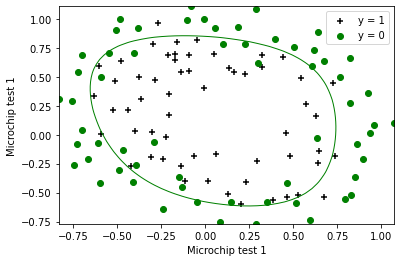

In [122]:
plot_decisionboundary(X, Y, Theta_opt, poly, 'g')

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='y = 1')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'y = 0')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 1')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))

In [123]:
porcentaje_aciertos = evaluacion(Theta_opt, XX, Y)
print("El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: {}%".format(porcentaje_aciertos))

El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: 83.05084745762711%


Lambda 150 con plot color b - 58.47457627118644%
Lambda 100 con plot color g - 60.16949152542372%
Lambda 50 con plot color r - 69.49152542372882%
Lambda 10 con plot color c - 74.57627118644068%
Lambda 1 con plot color m - 83.05084745762711%
Lambda 0.5 con plot color y - 82.20338983050848%
Lambda 0.25 con plot color k - 83.05084745762711%


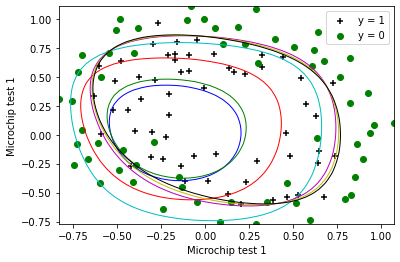

In [131]:
lambdas = [150, 100, 50, 10, 1, 0.5, 0.25]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
j=0
for i in lambdas:
    result = opt.fmin_tnc(func=coste_reg, x0=Theta, fprime=gradiente_reg, args=(XX,Y,i))
    Theta_opt=result[0]
    plot_decisionboundary(X, Y, Theta_opt, poly, colors[j])
    porcentaje_aciertos = evaluacion(Theta_opt, XX, Y)
    print("Lambda {} con plot color {} - {}%".format(i, colors[j], porcentaje_aciertos))
    j = j+1
    
pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='y = 1')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'y = 0')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 1')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))